In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn_evaluation.plot import confusion_matrix
%matplotlib inline

In [2]:
news_train = pd.read_excel('D:\\pradhAna\\snAtak\\pramANam\\saGgaNan\\datasets\\newsclass_train.xlsx')
news_train.head()

,STORY,SECTION
0,But the most painful was the huge reversal in ...,3
1,How formidable is the opposition alliance amon...,0
2,Most Asian currencies were trading lower today...,3
3,"If you want to answer any question, click on ‘...",1
4,"In global markets, gold prices edged up today ...",3


In [3]:
news_tst = pd.read_excel('D:\\pradhAna\\snAtak\\pramANam\\saGgaNan\\datasets\\newsclass_test.xlsx')
news_tst.head()

,STORY
0,2019 will see gadgets like gaming smartphones ...
1,It has also unleashed a wave of changes in the...
2,It can be confusing to pick the right smartpho...
3,The mobile application is integrated with a da...
4,We have rounded up some of the gadgets that sh...


In [4]:
news_tst['SECTION'] = np.nan

In [5]:
news_tst

,STORY,SECTION
0,2019 will see gadgets like gaming smartphones ...,NaN
1,It has also unleashed a wave of changes in the...,NaN
2,It can be confusing to pick the right smartpho...,NaN
3,The mobile application is integrated with a da...,NaN
4,We have rounded up some of the gadgets that sh...,NaN
5,"""Imagine if every message you sent was kept wi...",NaN
6,Positioned along the four sides of the Asus RO...,NaN
7,"In fact, when I applied to USC film school the...",NaN
8,"As spotted by Android Police, Netflix is testi...",NaN
9,Her moves were immaculately choreographed as s...,NaN


In [8]:
news = pd.concat([news_train, news_tst], axis=0)

In [11]:
keys = {0:'pol', 1:'tec', 2:'ent', 3:'biz'}
news['SECTION'] = news['SECTION'].map(keys)

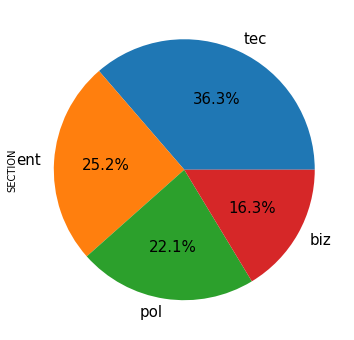

In [12]:
news.SECTION.value_counts().plot(kind='pie', figsize=(6, 6), fontsize=15, autopct='%1.1f%%')

In [13]:
#removing punctuations, dissimilar cases
news['STORY'] = news['STORY'].str.replace('[^\w\s]', '').str.lower()

In [15]:
news_tr = news.iloc[:7628, :]
news_te = news.iloc[7628:, :]

In [16]:
news_tr.tail()

,STORY,SECTION
7623,karnataka has been a congress bastion but it a...,pol
7624,the film which also features janhvi kapoor wil...,ent
7625,the database has been created after bringing t...,tec
7626,the state which has had an uneasy relationship...,pol
7627,virus stars kunchacko boban tovino thomas indr...,ent


In [17]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image

In [18]:
pol_news_tr = news_tr.loc[news_tr['SECTION']=='pol']
tec_news_tr = news_tr.loc[news_tr['SECTION']=='tec']
ent_news_tr = news_tr.loc[news_tr['SECTION']=='ent']
biz_news_tr = news_tr.loc[news_tr['SECTION']=='biz']

pol_story = pol_news_tr['STORY'].to_string()
tec_story = tec_news_tr['STORY'].to_string()
ent_story = ent_news_tr['STORY'].to_string()
biz_story = biz_news_tr['STORY'].to_string()

In [19]:
pol_news_tr.head()

,STORY,SECTION
1,how formidable is the opposition alliance amon...,pol
24,this story has been published from a wire agen...,pol
26,the statements in which yeddyurappa says that ...,pol
27,as nda seeks reelection agriculture will form ...,pol
28,yeddyurappa said the iaf air strikes would ben...,pol


In [20]:
stopwords = set(STOPWORDS)

(-0.5, 399.5, 199.5, -0.5)

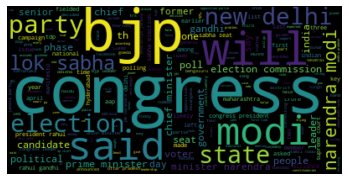

In [21]:
pol_wc = WordCloud(stopwords=stopwords).generate(pol_story)
plt.imshow(pol_wc, interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

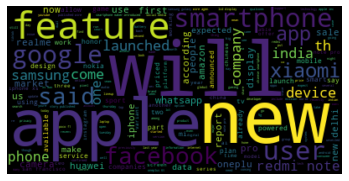

In [22]:
tec_wc = WordCloud(stopwords=stopwords).generate(tec_story)
plt.imshow(tec_wc, interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

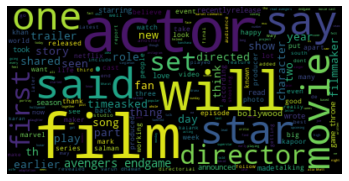

In [23]:
ent_wc = WordCloud(stopwords=stopwords).generate(ent_story)
plt.imshow(ent_wc, interpolation='bilinear')
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

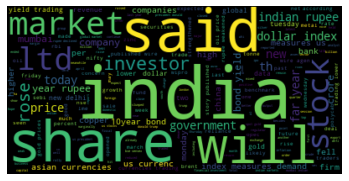

In [24]:
biz_wc = WordCloud(stopwords=stopwords).generate(biz_story)
plt.imshow(biz_wc, interpolation='bilinear')
plt.axis('off')

pol: congress, bjp, election, party
tec: new, feature, apple, user
ent: film, actor, star, movie
biz: india, said, share, market

In [26]:
X_train = news_tr.copy()
y_train = news_tr['SECTION'].copy()
X_test = news_te.copy()
y_test = news_te['SECTION'].copy()

In [ ]:
from bs4 import BeautifulSoup

In [31]:
def tag_rmv(txt):
    soup=BeautifulSoup(txt, "html.parser")
    strp_txt=soup.get_text(separator=" ")
    return strp_txt

In [36]:
for column in X_test:
    X_test = X_test['STORY'].strip()

AttributeError: 'Series' object has no attribute 'strip'

In [29]:
## Naive Bayes
# converting data to vectors
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(news['STORY'])
y = news['SECTION']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

mnbayes = MultinomialNB(alpha=1)
mnbayes.fit(X_train, y_train)
mnbayes.score(X_test, y_test)

ValueError: could not convert string to float: 'but the most painful was the huge reversal in fee income unheard of among private sector lenders essentially it means that yes bank took it for granted that fees on structured loan deals will be paid and accounted for upfront on its books as borrowers turned defaulters the fees tied to these loan deals fell off the cracks gill has now vowed to shift to a safer accounting practice of amortizing fee income rather than booking these upfront\n\n\ngills move to mend past ways means that there will be no nasty surprises in the future this is good news considering that investors love a clean image and loathe uncertainties\n\n\nbut there is no gain without pain and the promise of a strong and stable balance sheet comes with some sacrifices as well investors will have to give up the hopes of phenomenal growth a promise made by kapoor'

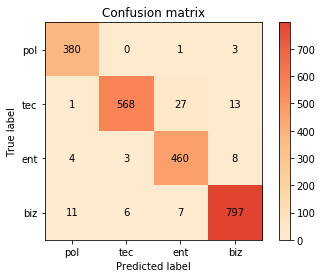

In [48]:
confusion_matrix(y_test, mnbayes.predict(X_test), target_names = ['pol','tec','ent','biz']).grid(False)

In [53]:
## SGD
sgd = SGDClassifier(n_jobs=-1, max_iter=10, random_state=123)

#hyp tuning
sgd_grid = [{'loss':['hinge', 'log', 'squared_hinge'], 'alpha': [0.0001, 0.0001, 0.00001]}]

#gs w/ cv
sgd_search = GridSearchCV(estimator=sgd, param_grid=sgd_grid, cv=5, refit=True)
sgd_search.fit(X_train, y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SGDClassifier(alpha=0.0001, average=False,
                                     class_weight=None, early_stopping=False,
                                     epsilon=0.1, eta0=0.0, fit_intercept=True,
                                     l1_ratio=0.15, learning_rate='optimal',
                                     loss='hinge', max_iter=10,
                                     n_iter_no_change=5, n_jobs=-1,
                                     penalty='l2', power_t=0.5,
                                     random_state=123, shuffle=True, tol=0.001,
                                     validation_fraction=0.1, verbose=0,
                                     warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.0001, 0.0001, 1e-05],
                          'loss': ['hinge', 'log', 'squared_hinge']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=Fals

In [54]:
sgd_search.best_params_

{'alpha': 1e-05, 'loss': 'hinge'}

In [55]:
sgd_search.best_estimator_.score(X_test, y_test)

0.9576234163390127

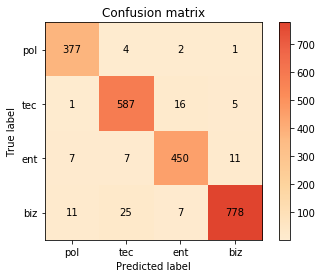

In [56]:
confusion_matrix(y_test, sgd_search.best_estimator_.predict(X_test), target_names = ['pol','tec','ent','biz']).grid(False)

In [57]:
##story-section fnc
def title_to_category(story):
    categories = {'pol' : 'politics', 
                  'tec' : 'technology', 
                  'ent' : 'entertainment', 
                  'biz' : 'business'}
    pridicter = sgd_search.best_estimator_.predict(vectorizer.transform([story]))
    return categories[pridicter[0]]

In [60]:
print('story', '            ', 'category', '\n' 
      'NCP stunned', '      ',  title_to_category('NCP stunned, Shiv Sena angry and Cong mute after Saturday coup'), '\n'
      'Pegasus attacked', '  ', title_to_category('Pegasus attacked 121 in India, breached 20: WhatsApp to government'), '\n'
      'Hema Malini', '      ',  title_to_category('Hema Malini says sterlisation attempts have turned monkeys violent'), '\n'
      'William Dean', '     ',  title_to_category('Howells complained the public wanted "a tragedy with a happy ending." Movie musicals once knew how to give it to them.')

     )

story              category 
NCP stunned        entertainment 
Pegasus attacked    technology 
Hema Malini        entertainment 
William Dean       entertainment
